# Experiments for detecting cords

## Import modules

In [60]:
import Permutations as pm
from ToolsForQuasiCord import *

import sympy
sympy.init_printing()

import itertools
from tqdm.notebook import tqdm

import plotly.express as px
from plotly.subplots import make_subplots
# from ipywidgets import interactive, HBox, VBox

In [2]:
def cc(sqr):
    '''Return the number of components of the quasi-cord associated with a given Square'''
    return len(pm.cycle_decomp(sqr.permutation()))

## Find moves keeping number of components

### To be $T+L = B+R$

In [3]:
N = 50
equals,alters,errors = 0,0,0
for i in range(N):
    sqr_org = square_random_generator(max=20)
    c_org = sqr_org.code
    
    diff = (c_org[0]+c_org[1])-(c_org[2]+c_org[3])
    c_alt = [c_org[0], c_org[1]+diff, c_org[2], c_org[3]]
    
    flag = True
    try:
        sqrs = [sqr_org, Square(c_alt)]
        nums = [cc(sqr) for sqr in sqrs]
    except:
        errors += 1
        flag = False
        pass

    if flag:
        if nums[0] == nums[1]:
            equals += 1
        else:
            alters += 1
print("eql = {}, alt = {}, err = {}".format(equals, alters, errors))        
#     print([sqr.code for sqr in sqrs],nums)
#     for i in range(2): display(get_diagram(sqrs[i].grid_diagram()))

eql = 22, alt = 15, err = 13


### $T=L$

In [4]:
b = 1
for r in range(1,20):
    seq = []
    low = int((b+r)/2)
    for k in range(low,30+low):
        try:
            sqr = Square([k,k,b,r])
            num = cc(sqr)
        except: num = 0
        seq += [num]
    print(r,seq)

1 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
2 [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
3 [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
4 [0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
5 [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
6 [0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
7 [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8 [0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
9 [2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10 [0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
11 [1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

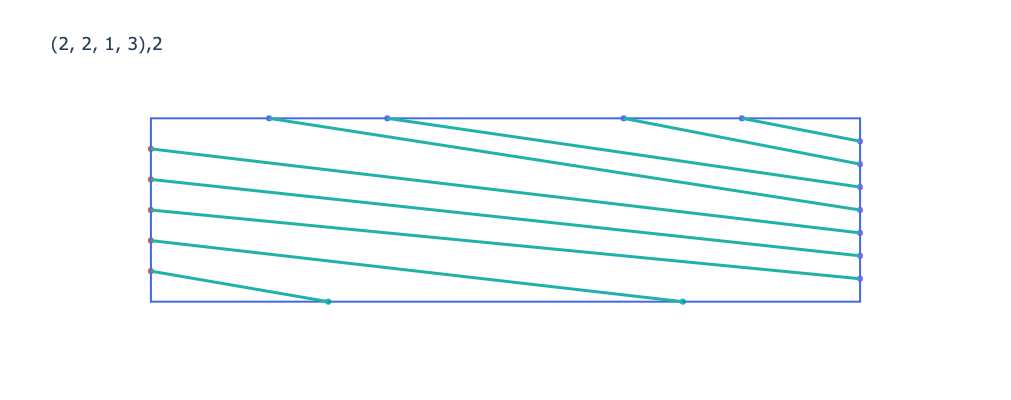

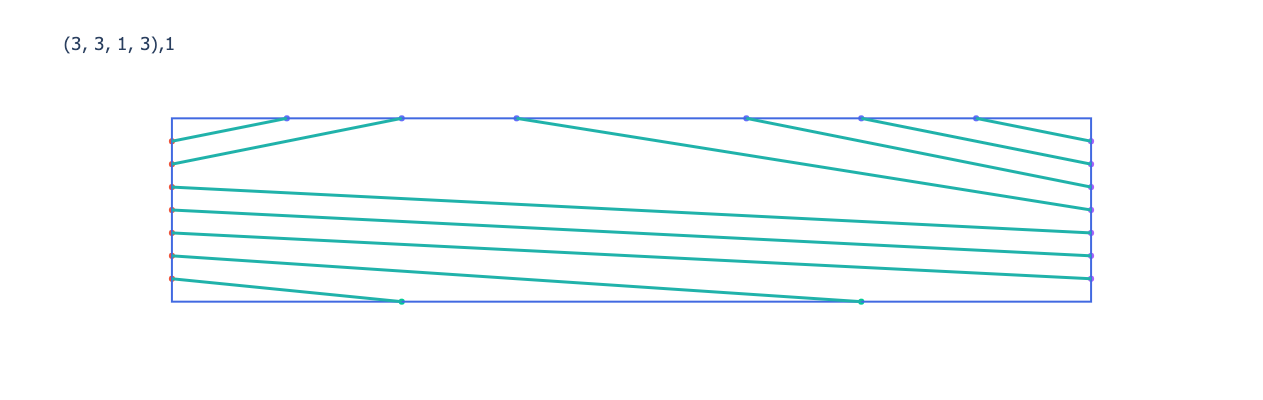

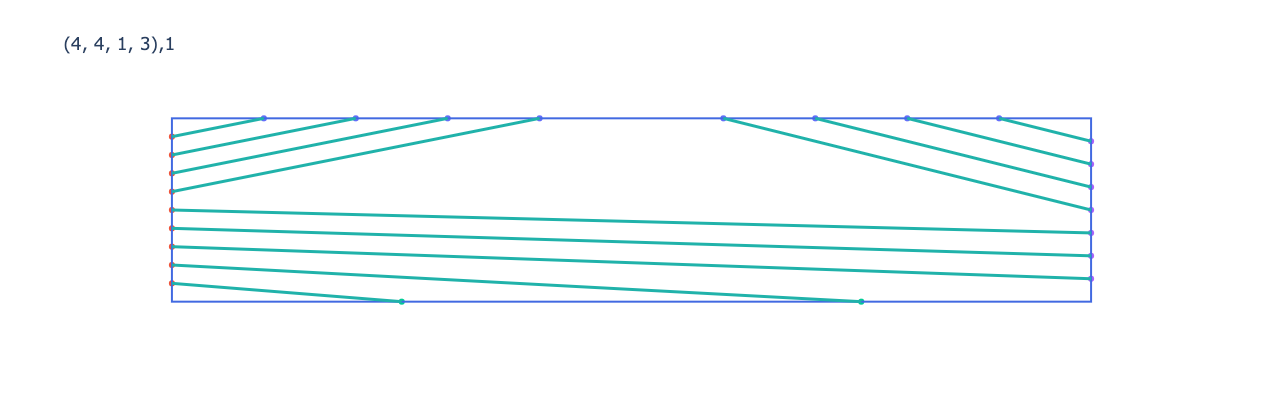

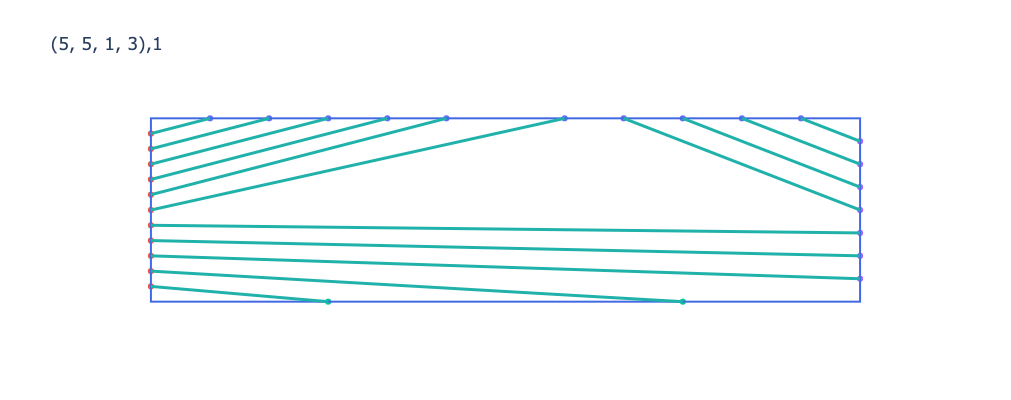

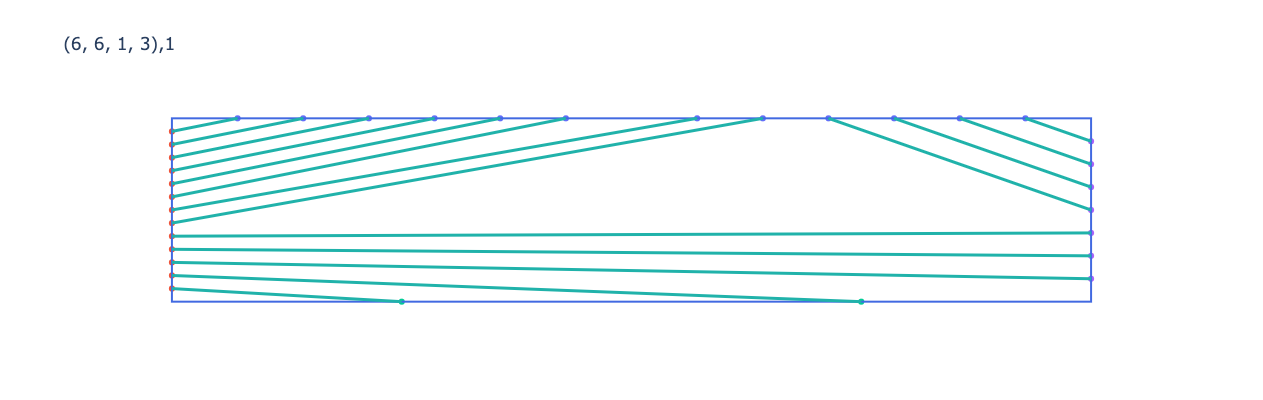

In [5]:
b, r = 1, 3
t = int((b+r)/2) + (b+r)%2

crds = [[k,k,b,r] for k in range(t,t+5)]
sqrs = [Square(crd) for crd in crds]

for sqr in sqrs:
    fig1 = go.FigureWidget(sqr.graphic())
    c = sqr.code
    fig1.update_layout(title = "{},{}".format(c, cc(sqr)))
#     fig2 = get_diagram(sqr.matrix())
    
    fig1.show()

  0%|          | 0/16 [00:00<?, ?it/s]

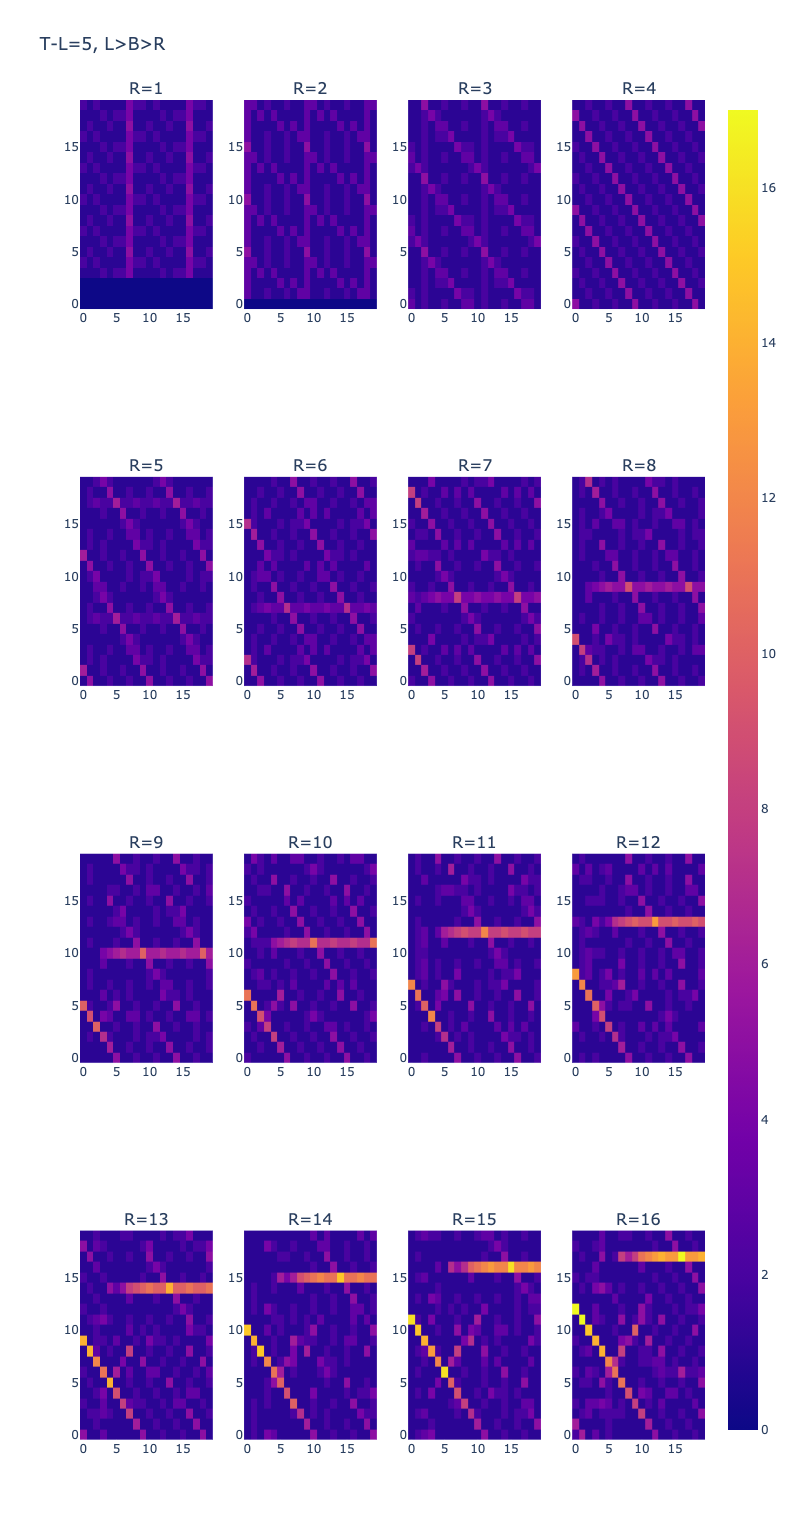

In [103]:
Delta = 5
N = 20
#---
Row, Col = 4, 4
fig = make_subplots(Row,Col,subplot_titles=["R={}".format(v) for v in range(1,Row*Col+1)])
#---
for i,j in tqdm(itertools.product(range(Row),range(Col)),total=Row*Col):
    mat = []
    r = 1+i*Col+j
    for b in range(r,N+r):
        seq = []
        for l in range(b,N+b):
            flag = True
            try:
                sqr = Square([l+Delta,l,b,r])
            except: 
                flag = False
            #---
            if flag:
                num = cc(sqr)
            else: num = 0
            seq += [num]
        mat += [seq]
    #---
    fig.append_trace(px.imshow(mat).data[0],i+1,j+1)
#---
fig.update_layout(height=380*Row,width=300*Col,title="T-L={}, L>B>R".format(Delta))    
fig.show()

  0%|          | 0/16 [00:00<?, ?it/s]

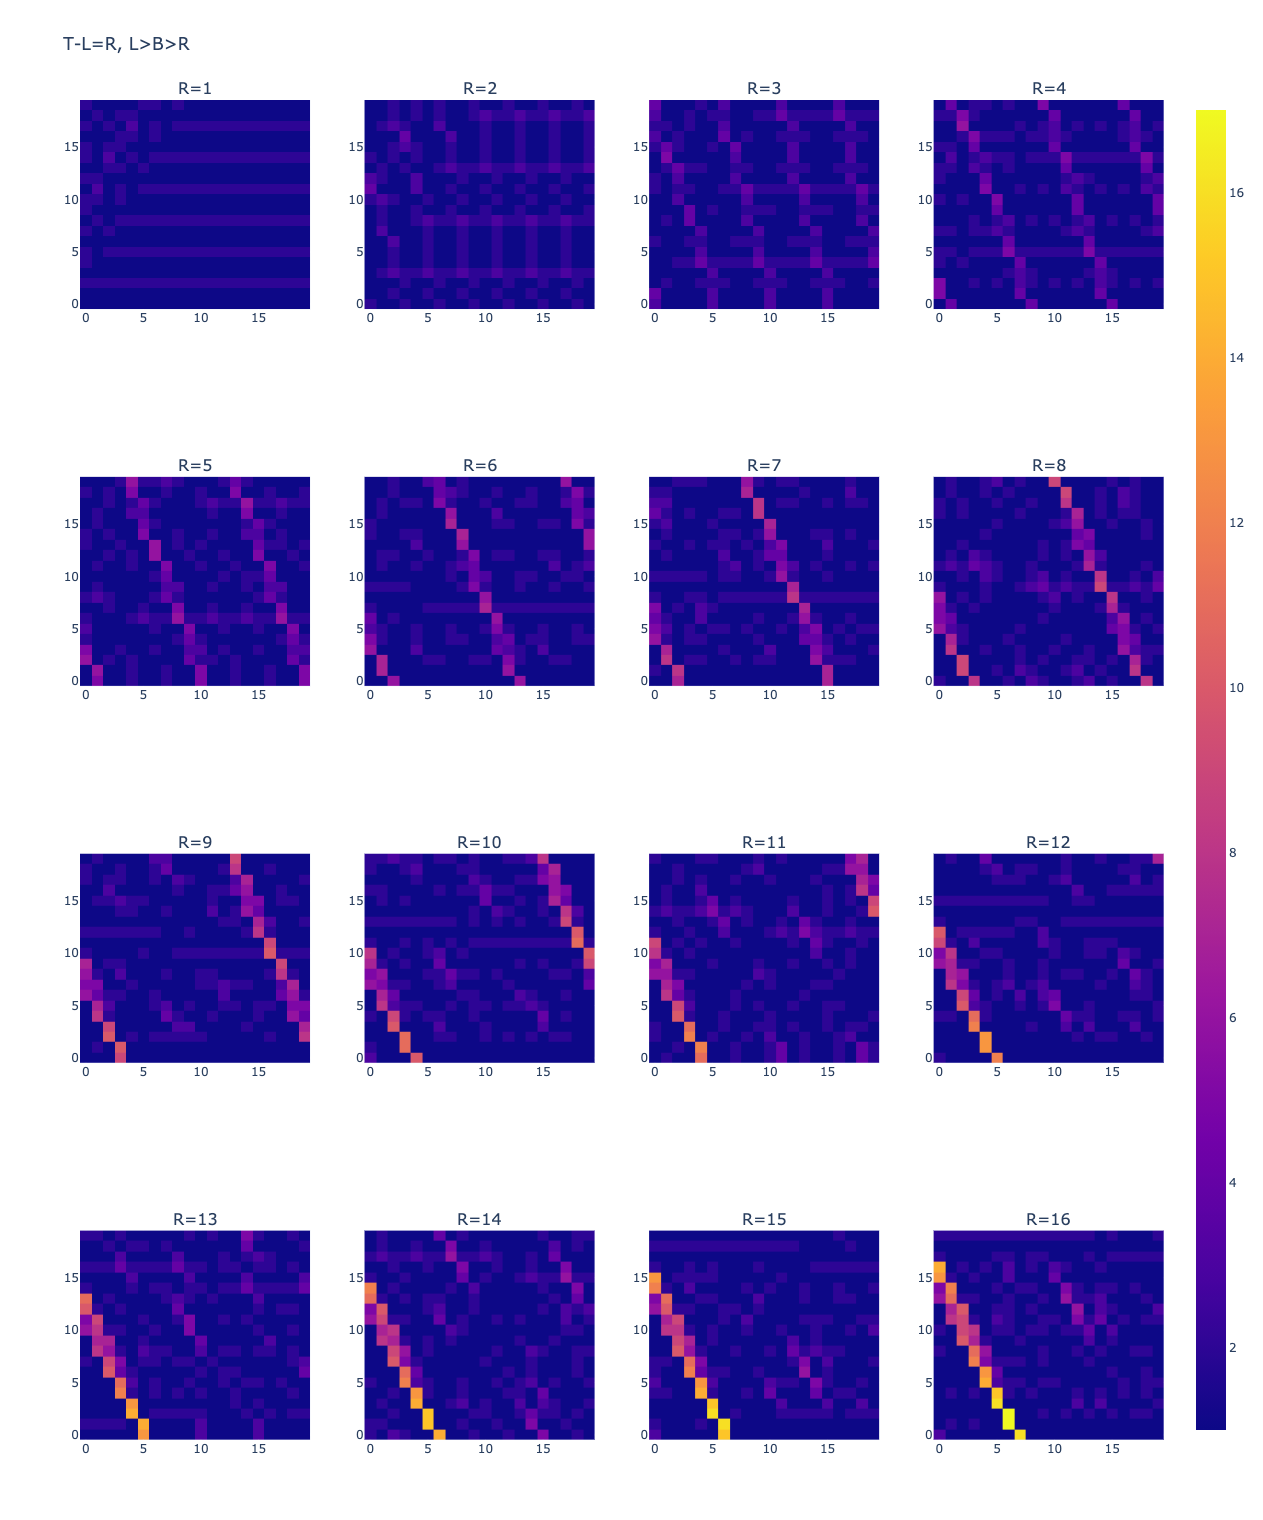

In [108]:
N = 20
#---
Row, Col = 4, 4
fig = make_subplots(Row,Col,subplot_titles=["R={}".format(v) for v in range(1,Row*Col+1)])
#---
for i,j in tqdm(itertools.product(range(Row),range(Col)),total=Row*Col):
    mat = []
    r = 1+i*Col+j
    for b in range(r,N+r):
        seq = []
        s = int(b/2)+b%2+2
        for l in range(s,N+s):
            flag = True
            try:
                sqr = Square([l+r,l,b,r])
            except: 
                flag = False
            #---
            if flag:
                num = cc(sqr)
            else: num = 0
            seq += [num]
        mat += [seq]
    #---
    fig.append_trace(px.imshow(mat).data[0],i+1,j+1)
#---
fig.update_layout(height=380*Row,width=300*Col,title="T-L=R, L>B>R")    
fig.show()

In [7]:
N=200
M=30
for i in tqdm(range(N)):
    r = np.random.randint(1,M)
    b = np.random.randint(1,M)
    t = int((b+r)/2) + (b+r)%2 + np.random.randint(2*M)
#     t = (b+r) + np.random.randint(2*M)
    try:
        sqrs = [Square([t,t,b,r]), Square([t+1,t+1,b,r])]
    except: pass
    nums = [cc(sqr) for sqr in sqrs]
    if nums[0] != nums[1]:
        print(f"{nums},(t,b+r)=({t},{b+r}),t-(b+r)={t-(b+r)}")
#         print(sqrs[0].code, sqrs[1].code)

  0%|          | 0/200 [00:00<?, ?it/s]

[3, 1],(t,b+r)=(22,40),t-(b+r)=-18
[1, 2],(t,b+r)=(28,37),t-(b+r)=-9
[3, 1],(t,b+r)=(39,44),t-(b+r)=-5
[1, 2],(t,b+r)=(19,32),t-(b+r)=-13
[1, 7],(t,b+r)=(29,44),t-(b+r)=-15
[5, 1],(t,b+r)=(14,27),t-(b+r)=-13
[2, 3],(t,b+r)=(22,28),t-(b+r)=-6
[2, 1],(t,b+r)=(23,30),t-(b+r)=-7
[1, 6],(t,b+r)=(30,43),t-(b+r)=-13
[5, 2],(t,b+r)=(12,23),t-(b+r)=-11
[1, 2],(t,b+r)=(35,51),t-(b+r)=-16
[5, 4],(t,b+r)=(18,29),t-(b+r)=-11
[2, 1],(t,b+r)=(32,46),t-(b+r)=-14
[7, 1],(t,b+r)=(41,44),t-(b+r)=-3
[2, 1],(t,b+r)=(34,52),t-(b+r)=-18
[1, 5],(t,b+r)=(18,36),t-(b+r)=-18
[2, 1],(t,b+r)=(27,44),t-(b+r)=-17
[2, 1],(t,b+r)=(17,30),t-(b+r)=-13
[1, 2],(t,b+r)=(15,28),t-(b+r)=-13
[1, 2],(t,b+r)=(26,36),t-(b+r)=-10
[7, 1],(t,b+r)=(32,38),t-(b+r)=-6
[1, 4],(t,b+r)=(34,38),t-(b+r)=-4
[2, 1],(t,b+r)=(21,41),t-(b+r)=-20
[2, 1],(t,b+r)=(16,24),t-(b+r)=-8
[1, 2],(t,b+r)=(24,39),t-(b+r)=-15
[4, 6],(t,b+r)=(25,28),t-(b+r)=-3
[2, 1],(t,b+r)=(23,27),t-(b+r)=-4


In [8]:
N=500
M=10  #50
count = 0
for i in tqdm(range(N)):
    r = np.random.randint(1,M)
    b = np.random.randint(1,M)
    t = (b+r)  #int((b+r)/2) + (b+r)%2
    t += np.random.randint(2*M)
    l = t - 1
    try:
        sqrs = [Square([t,l,b,r]), Square([t+1,l+1,b,r])]
    except: pass
    nums = [cc(sqr) for sqr in sqrs]
    if nums[0] != nums[1]:
        count += 1
#         print(f"{nums},(t,b+r)=({t},{b+r}),{2*t-(b+r)}")
#         print(sqrs[0].code, sqrs[1].code)
print(count)

  0%|          | 0/500 [00:00<?, ?it/s]

6


  0%|          | 0/900 [00:00<?, ?it/s]

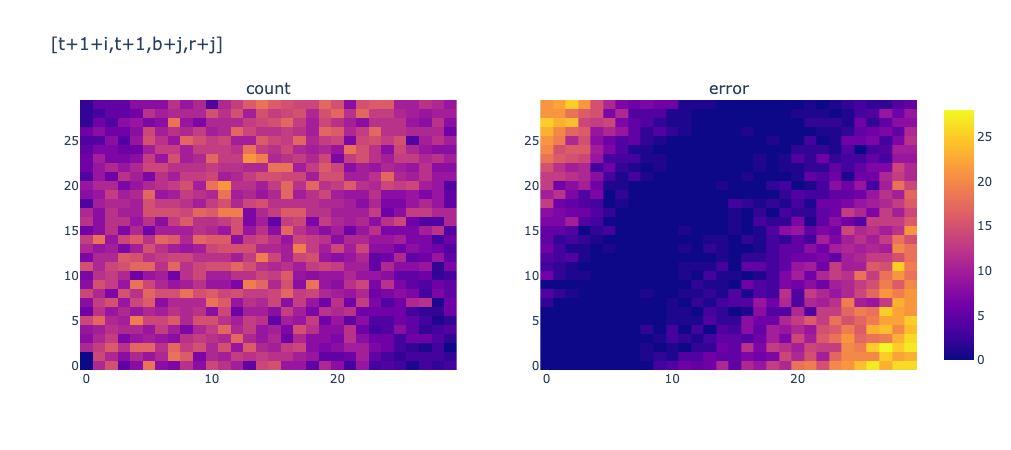

In [15]:
Cnt, Rng, Max = 30, 30, 20
#-----
mtx = np.zeros((Rng,Rng), dtype=int)
err = np.zeros((Rng,Rng), dtype=int)
for (i,j) in tqdm(itertools.product(range(Rng),range(Rng)), total=Rng**2):
    for itr in range(Cnt):
        r = np.random.randint(1,Max)
        b = np.random.randint(1,Max)
        t = (b+r)  #int((b+r)/2) + (b+r)%2  # 
        t += np.random.randint(Max)
        #---
        codes = [[t,t,b,r], [t+1+i,t+1,b+j,r+j]]
        #---
        try:
            nums = [cc(Square(code)) for code in codes]
            if nums[0] != nums[1]:
                mtx[i][j] += 1
        except:
            err[i][j] += 1
#-----
fig = make_subplots(rows=1, cols=2,subplot_titles=("count","error"))
fig.append_trace(px.imshow(mtx).data[0],1,1)
fig.append_trace(px.imshow(err).data[0],1,2)
fig.update_layout(title="[t+1+i,t+1,b+j,r+j]")
fig.show()

### Increase numbers of 4-tuple

#### Increase $T$ and $L$

In [ ]:
sqr_org = square_random_generator(max=8)
c = sqr_org.code
print(c)

mat = []

N=20
for i in range(N):
    seq = []
    for j in range(N):
        flag = True
        try:
            sqr = Square([c[0]+i, c[1]+j, c[2], c[3]])
        except: 
            flag = False
        #---
        if flag:
            num = cc(sqr)
        else: num = 0
        seq += [num]
    mat += [seq]
    print("{}".format(seq))
    
print("\n")
for i in range(N):
    if mat[i][0] > 0:
        seq = [mat[i+k][k] for k in range(N-i)]
        print(seq)
for j in range(1,N):
    if mat[0][j] > 0:
        seq = [mat[k][k+j] for k in range(N-j)]
        print(seq)

In [ ]:
i,j = 0,4
N=200
seq = []
errors = 0
for k in tqdm(range(N)):
    r = np.random.randint(N)
    r -= min(c[:2])
    flag = True
    try:
        sqr = Square([c[0]+i+r, c[1]+j+r, c[2], c[3]])
    except:
        errors += 1
        flag = False
    #---
    if flag:
        num = cc(sqr)
        if num != 1:
            print("{},{}".format(sqr.code,num))
print("err:", errors)

#### Increase all digits

In [ ]:
sqr_org = square_random_generator(max=12)
c = sqr_org.code
print(c)

mat = []

N=20
for i in range(N):
    seq = []
    for j in range(N):
        flag = True
        try:
            sqr = Square([c[0]+i, c[1]+j, c[2]+j, c[3]+i])
        except: 
            flag = False
        #---
        if flag:
            num = cc(sqr)
        else: num = 0
        seq += [num]
    mat += [seq]
    print("{}".format(seq))
    
print("\n")
for i in range(N):
    if mat[i][0] > 0:
        seq = [mat[i+k][k] for k in range(N-i)]
        print(seq)
for j in range(1,N):
    if mat[0][j] > 0:
        seq = [mat[k][k+j] for k in range(N-j)]
        print(seq)

In [ ]:
i,j = 4,0
N=200
seq = []
errors = 0
for k in tqdm(range(N)):
    r = np.random.randint(N)
    r -= min(c[:2])
    flag = True
    try:
        sqr = Square([c[0]+i+r, c[1], c[2]+j+r, c[3]])
    except:
        errors += 1
        flag = False
    #---
    if flag:
        num = cc(sqr)
        if num != 1:
            print("{},{}".format(sqr.code,num))
print("err:", errors)

## Sequences of Number of Components

__Note:__ 
* quasi-cord を与える 4-tuple を Code と呼ぶ。Code には以下のルールがある。
$$
|T-L|-e <= B+R <= T+L,
$$
ここで、$e$ は $T=0$ のときは $0$ で、それ以外では $1$.

__TODO:__ 本当に上記の条件で完全か、検証が必要。

### $0$ が3つ、および2つの場合の考察:

* 0 が3つなら trivial cord.
```
proof) T=L=B=0 の場合、Code rule より R <= 0  i.e., R=0. 他も同様。
```
* 2つが $0$ のとき、
    * $T=L=0$ なら trivial cord.
    ```
    proof) Code rule より B+R <= 0  => B=R=0.
    ```        
    * その他では、$0$ でない2つの値は同じ。
    ```
    proof) case 1: T=0, B=0  --> L-1 <= R <=L  => L=R,
    case 2: T=0, R=0  --> L < B =< L  => L=B,
    case 3: L=0, B=0  --> T < R =< T  => T=R,
    case 4: L=0, R=0  --> T < B =< T  => T=B,
    case 5: B=0, R=0  --> |T-L| < 0 0, T =< L, L =< T  => T=L. 
    ```

__予想 3:__ $T,L,B,R$ のうちの 2つが $0$ の Code から得られる quasi-cord は cord.

--> (0,k,0,k) のとき以外は正しそう。(0,k,0,k) のときは、逆に全く cord にならないようだ。

    --> (0,k,0,k) のときは、segments が全て上辺・下辺に平行となる。よって、$k$ 個のループと1つのアーク($L$ と $R$ を直接つなぐ)となる。
    --> そういえば、この場合は3点穴付き円盤上の quasi-cord であり、全て cord であることが示されているんだった。

In [ ]:
seq = []
N=50
for k in range(1,N):
    sqr = Square([k,k,0,0])
#     display(sqr.permutation())
    seq += [cc(sqr)]
#     M = sqr.grid_diagram()
#     D = get_diagram(M)
#     display(D)
print(seq)

In [ ]:
seq = []
N=50
for k in range(1,N):
    sqr = Square([0,k,0,k])
    seq += [cc(sqr)]
print(seq)

### 1つだけが $0$ の場合の考察

* T=0
```
1) L >= B+R
2) 0 <= L+B+R
3) L <= B+R
```
=> L = B+R.
* L=0
```
1) T >= B+R
2) 0 <= L+B+R
3) T <= B+R
```
=> T = B+R.
* R=0
```
1) T+L >= B
2) T <= L+B
3) L <= T+B
```
=> ???

__予想 4:__ R=0 の場合、
* (l,k,k,0) は常に cord.
* (k,k+i,k,0) の成分数は $i+1$.

In [ ]:
N=30
for s in range(1,N-10):
    seq = []
    for k in range(s+1,N+s):
        sqr = Square([k,s,0,k-s]) #Square([k,s,k,0])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[k,{},0,k-{}] |-> {}".format(s,s,seq))

In [ ]:
N=100
cord = 0
err = 0
for i in range(N):
    t = np.random.randint(1,N)
    l = np.random.randint(2,N)
    r = np.random.randint(abs(t-l),t+l+1)
    
    flag = True
    try:
        code = [t,l,0,r]
        sqr = Square(code)
    except:
        flag = False
        err += 1
    if flag:
        num = cc(sqr)
        if num == 1:
            cord += 1
            print("{},{},{}".format(sqr.code,num,abs(r-l)==t))
        else:
            pass #print("{},{}".format(sqr.code,num))
print("cords: {}, errors:{}".format(cord,err))

In [ ]:
N=30
cord = 0
err = 0
for i in range(N):
    t = np.random.randint(1,N)
    l = np.random.randint(2,N)
    r = np.random.randint(abs(t-l),t+l+1)
    
    x = r-abs(t-l)+1
    y = t-abs(l-r)+1
    
    flag = True
    try:
        code = [t,l,0,r]
        sqr = Square(code)
    except:
        flag = False
        err += 1
    if flag:
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
        num = cc(sqr)
        if not num == 1:
            cord +=1
            if x == y:
                print("x=y,{},{},y={},{}".format(sqr.code,num,y,t==abs(l-r)))
            else:
                print("{},{},y={},{}".format(sqr.code,num,y,t==abs(l-r)))
print("cords: {}, errors:{}".format(cord,err))

__予想 6:__ $T > 0$ とするとき、$[T,L,0,R]$ が cord $\Longleftrightarrow$ $T=|L-R|$

In [ ]:
N=30
for s in range(1,N-10):
    seq = []
    for k in range(s+1,N+s):
        sqr = Square([0,k,s,k-s]) #Square([k,s,k,0])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#        sigma.display()
#        display(D)
        seq += [cc(sqr)]
    print("[0,k,{},k-{}] |-> {}".format(s,s,seq))

In [ ]:
N=30
for s in range(1,N-10):
    seq = []
    for k in range(1,N-10):
        sqr = Square([k,s,k+s,0])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#        sigma.display()
#        display(D)
        seq += [cc(sqr)]
    print("[k,{},k+{},0] |-> {}".format(s,s,seq))

In [ ]:
N=20
cord = 0
err = 0
for i in range(N):
    t = np.random.randint(1,N)
    l = np.random.randint(2,N)
    r = np.random.randint(abs(t-l),t+l+1)
    
    x = r-abs(t-l)
    y = t-abs(l-r)
    
    flag = True
    try:
        code = [t,l,1,r]
        sqr = Square(code)
    except:
        flag = False
        err += 1
    if flag:
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
        num = cc(sqr)
        if num == 1:
            cord +=1
            print("{},{},(x,y)=({},{})".format(sqr.code,num,x,y))
print("cords: {}, errors:{}".format(cord,err))

### $0$ がない場合の考察:

#### $T$=1 としてみる:

    ```
    1) L+1 >= B+R (>2)
    2) 1-L <= B+R 
    3) L-1 <= B+R
    ```

In [ ]:
N=30
for l in range(1,N):
    seq = []
    for b in range(1,l+1):
        sqr = Square([1,l,b,(1+l)-b])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[1,{},b,(1+l)-b] |-> {}".format(l,seq))

#### $B=R=1$ としてみる:

```
1) T+L >= 2
2) T-L <= 2
3) L-T <= 2
```

In [ ]:
N=30
for t in range(1,N):
    seq = []
    for d in range(3):
        l = t+d
        sqr = Square([t,l,1,1])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[{},L,1,1] |-> {}".format(t,seq))

#### $T+L=B+R$ の場合:

* $L=B$ としてみる:

In [ ]:
N=30
for tl in range(2,N):
    seq = []
    for t in range(2,tl+1):
        sqr = Square([t,tl-t,tl-t,t])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[T,{}-T,T,{}-T] |-> {}".format(tl,tl,seq))

__Note:__ $L=B+1$ の場合も全部 cord になるようだ。

* $L=B+2$ の場合:

In [ ]:
N=30
for tl in range(3,N):
    seq = []
    for t in range(1,tl-2):
        sqr = Square([t,tl-t,(tl-t)-2,t+2])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[T,{}-T,{}-T-2,T+2] |-> {}".format(tl,tl,seq))

* $L=B+3$ の場合:

In [ ]:
N=30
for tl in range(3,N):
    seq = []
    for t in range(1,tl-2):
        sqr = Square([t,tl-t,(tl-t)-3,t+3])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[T,{}-T,{}-T-2,T+2] |-> {}".format(tl,tl,seq))

__予想 5:__ $[T,tl-T,(tl-T)-k,T+k]$ の成分数は、$tl$, $k$ を固定したとき、$T$ には依らず一定。

In [ ]:
N = 10
k = np.random.randint(2,N)
tl = np.random.randint(k+3,N+k+3)

Ts = [np.random.randint(1,tl-k-1) for i in range(2)]
sqrs = [Square([T,tl-T,tl-T-k,T+k]) for T in Ts]
nums = [cc(sqr) for sqr in sqrs]

print([sqr.code for sqr in sqrs],nums)
for i in range(2): display(get_diagram(sqrs[i].grid_diagram()))

In [ ]:
N = 30
for i in tqdm(range(10)):
    k = np.random.randint(2,N)
    tl = np.random.randint(k+3,N+k+3)
    for j in range(100):
        Ts = [np.random.randint(1,tl-k-1) for i in range(2)]
        sqrs = [Square([T,tl-T,tl-T-k,T+k]) for T in Ts]
        nums = [cc(sqr) for sqr in sqrs]
        
        if nums[0] != nums[1]:
            print([sqr.code for sqr in sqrs],nums)

* $[1, L, L-k, 1+k]$ のラインナップ:

In [ ]:
N=20
for k in range(N):
    seq = []
    for tl in range(k,N+k):
        sqr = Square([1,tl,tl-k,1+k])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[1,L,L-{},1+{}] |-> {}".format(k,k,seq))

In [ ]:
N=20
for k in range(N):
    seq = []
    for tl in range(k,N+k):
        sqr = Square([tl,1,tl-k,1+k])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[T,1,T-{},1+{}] |-> {}".format(k,k,seq))

In [ ]:
N = 10
k = np.random.randint(2,N)
tl = np.random.randint(k+3,N+k+3)

Ts = [np.random.randint(1,tl-k-1) for i in range(2)]
sqrs = [Square([T,tl-T,tl-T-k,T+k]) for T in Ts]
nums = [cc(sqr) for sqr in sqrs]

print([sqr.code for sqr in sqrs],nums)
for i in range(2): display(get_diagram(sqrs[i].grid_diagram()))

## TODO